<a href="https://colab.research.google.com/github/litawandani/TugasPratikumML_234-244/blob/main/Model_1_fix(Base_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Machine Learning"

In [ ]:
%cd /content/drive/MyDrive/Machine Learning

/content/drive/MyDrive/Machine Learning


In [ ]:
!ls

'Alzheimer_s Dataset'   hparam.h5     model_2.h5	  WAML
 dataset	        kaggle.json  'noise-27 (9).jpg'
 dataset_model	        logs	      split_dataset


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

100% 34.0M/34.1M [00:01<00:00, 14.2MB/s]
100% 34.1M/34.1M [00:01<00:00, 20.8MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
from distutils.dir_util import copy_tree, remove_tree

base_dir = "/content/drive/My Drive/Machine Learning/Alzheimer_s Dataset"
root_dir = "./"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
  remove_tree (work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
!pip install split_folders
import splitfolders

src = "/content/drive/My Drive/Machine Learning/dataset"
base_dir = "/content/drive/My Drive/Machine Learning/split_dataset"

splitfolders.ratio(src, output = base_dir, seed=240, ratio=(0.8,0.2))

Copying files: 6400 files [01:22, 77.66 files/s]


In [ ]:
base_dir = "/content/drive/My Drive/Machine Learning/split_dataset"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

MildDem_train_dir = os.path.join(train_dir, 'MildDemented')
ModDem_train_dir = os.path.join(train_dir, 'ModerateDemented')
NonDem_train_dir = os.path.join(train_dir, 'NonDemented')
VermilDem_train_dir = os.path.join(train_dir, 'VeryMildDemented')

MildDem_val_dir = os.path.join(validation_dir, 'MildDemented')
ModDem_val_dir = os.path.join(validation_dir, 'ModerateDemented')
NonDem_val_dir = os.path.join(validation_dir, 'NonDemented')
VermilDem_val_dir = os.path.join(validation_dir, 'VeryMildDemented')

In [ ]:
print('total training MildDemented images :', len(os.listdir(MildDem_train_dir)))
print('total training ModerateDemented images :', len(os.listdir(ModDem_train_dir)))
print('total training NonDemented images :', len(os.listdir(NonDem_train_dir)))
print('total training VeryMildDemented images :', len(os.listdir(VermilDem_train_dir)))

print('\ntotal validation MildDemented images :', len(os.listdir(MildDem_val_dir)))
print('total validation ModerateDemented images :', len(os.listdir(ModDem_val_dir)))
print('total validation NonDemented images :', len(os.listdir(NonDem_val_dir)))
print('total validation VeryMildDemented images :', len(os.listdir(VermilDem_val_dir)))

total training MildDemented images : 716
total training ModerateDemented images : 51
total training NonDemented images : 2560
total training VeryMildDemented images : 1792

total validation MildDemented images : 180
total validation ModerateDemented images : 13
total validation NonDemented images : 640
total validation VeryMildDemented images : 448


In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 200
width = 200
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 5119 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (200,200))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (200,200))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Val Data = ", val_data.shape)
print("Val Label = ", val_label.shape)

Train Data =  (5119, 200, 200, 3)
Train Label =  (5119,)
Val Data =  (1281, 200, 200, 3)
Val Label =  (1281,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented'
 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalAveragePooling2D, Dropout

In [ ]:
# Tulis Kode Anda Disini
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[200,200,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.15))
flatten = model.add(Flatten())

In [ ]:
# Fully Connected Layer

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
from tensorflow.keras.optimizers import Adam

CALLBACKS = [my_callback]

model.compile(optimizer=Adam(learning_rate=0.0001, decay=0.0001/32), # decay = learning_rate / batch_size 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
#Fit the training data to the model and validate it using the validation data
history = model.fit(train_generator, batch_size = 32, epochs = 100, validation_data=val_generator, callbacks=CALLBACKS)

Epoch 1/100
160/160 [==============================] - 67s 352ms/step - loss: 1.0604 - acc: 0.4964 - val_loss: 1.0474 - val_acc: 0.4996
Epoch 2/100
160/160 [==============================] - 56s 348ms/step - loss: 1.0284 - acc: 0.5011 - val_loss: 0.9970 - val_acc: 0.5004
Epoch 3/100
160/160 [==============================] - 55s 342ms/step - loss: 0.9522 - acc: 0.5335 - val_loss: 0.9175 - val_acc: 0.5550
Epoch 4/100
160/160 [==============================] - 55s 345ms/step - loss: 0.9324 - acc: 0.5482 - val_loss: 0.8969 - val_acc: 0.5550
Epoch 5/100
160/160 [==============================] - 55s 344ms/step - loss: 0.9126 - acc: 0.5575 - val_loss: 0.9014 - val_acc: 0.5176
Epoch 6/100
160/160 [==============================] - 55s 345ms/step - loss: 0.9103 - acc: 0.5566 - val_loss: 0.9077 - val_acc: 0.5605
Epoch 7/100
160/160 [==============================] - 55s 344ms/step - loss: 0.9005 - acc: 0.5624 - val_loss: 0.8683 - val_acc: 0.5808
Epoch 8/100
160/160 [===========================

In [ ]:
target_dir = "/content/drive/MyDrive/ML"
model.save(target_dir + '/model3.h5')

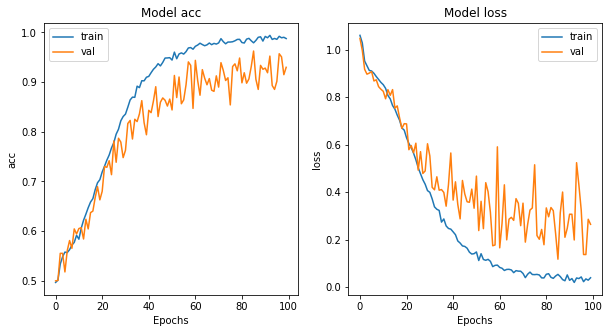

In [ ]:
#Plotting the trend of the metrics during training
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
train_scores = model.evaluate(train_generator)
val_scores = model.evaluate(val_generator)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))

41/41 [==============================] - 3s 67ms/step - loss: 0.2643 - acc: 0.9297
Training Accuracy: 99.57%
Validation Accuracy: 92.97%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model.predict(val_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    MildDemented       0.93      0.92      0.92       180
ModerateDemented       0.86      0.92      0.89        13
     NonDemented       0.96      0.93      0.95       640
VeryMildDemented       0.89      0.94      0.91       448

        accuracy                           0.93      1281
       macro avg       0.91      0.93      0.92      1281
    weighted avg       0.93      0.93      0.93      1281

